<a href="https://colab.research.google.com/github/Muniz97/Yellow-fever-Febre-Amarela/blob/main/Codigos_Machine_Learning_lidando_com_dados_de_muitas_dimens%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
Curso: Machine Learning lidando com dados de muitas dimensões
Professor: Thiago
'''

'\nCurso: Machine Learning lidando com dados de muitas dimensões\nProfessor: Thiago\n'

In [ ]:
'''
Aula 1 - Dados com muitas dimensões
'''

'\nAula 1 - Dados com muitas dimensões\n'

In [ ]:
# Problema na classificação

In [ ]:
# dados
import pandas as pd

resultados_exames = pd.read_csv('/content/exames.csv')
resultados_exames.head()

# Raw -> https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [ ]:
resultados_exames.shape # Dimensão do dataset (número de linhas e colunas)

(569, 35)

In [ ]:
from sklearn.model_selection import train_test_split # Biblioteca que faz a separação de treino e teste
import numpy as  np

SEED = 123143
np.random.seed(SEED) # Define o valor de seed na aleatoriedade no train teste split e até modelos

valores_exames = resultados_exames.drop(columns=['id','diagnostico']) # Pega todas as colunas/features menos id e diagnostico
diagnostico = resultados_exames.diagnostico


treino_x,teste_x, treino_y, teste_y = train_test_split(valores_exames,
                                                      diagnostico,
                                                       random_state= SEED)

In [ ]:
treino_x.head()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
114,8.726,15.83,55.84,103.78,230.9,0.11500,0.08201,0.04132,0.01924,0.1649,...,64.48,284.4,0.17240,0.23640,0.24560,0.786,0.10500,0.2926,0.10170,NaN
457,13.210,25.25,84.10,103.78,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,...,91.29,632.9,0.12890,0.10630,0.13900,0.786,0.06005,0.2444,0.06788,NaN
269,10.710,20.39,69.50,103.78,344.9,0.10820,0.12890,0.08448,0.02867,0.1668,...,76.51,410.4,0.13350,0.25500,0.25340,0.786,0.08600,0.2605,0.08701,NaN
520,9.295,13.90,59.96,103.78,257.8,0.13710,0.12250,0.03332,0.02421,0.2197,...,67.84,326.6,0.18500,0.20970,0.09996,0.786,0.07262,0.3681,0.08982,0.505731
38,14.990,25.20,95.54,103.78,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,...,95.54,698.8,0.09387,0.05131,0.02398,0.786,0.02899,0.1565,0.05504,NaN


In [ ]:
treino_y.head()

114    B
457    B
269    B
520    B
38     M
Name: diagnostico, dtype: object

In [ ]:
from sklearn.ensemble import RandomForestClassifier # importa o modelo de RandomForestClassifier

classificador = RandomForestClassifier(n_estimators = 100) # n_estimators é o numero de árvores de decisão que seram usada

classificador.fit(treino_x,treino_y) # gera modelo com dados de treinamento
print(classificador.score(teste_x,teste_y)) # score já tras a acuracia do modelo

# Ocorreu um erro proposital, avisando que temos muitos valores de NaN ou features de float  estouradas

ValueError: ignored

In [ ]:
# Trabalhando com valores faltantes

In [ ]:
resultados_exames.isnull() # Valore nulos no dataframe

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
resultados_exames.isnull().sum() # quantidade de valores nulos em cada coluna

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 123143
random.seed(SEED)

valores_exames = resultados_exames.drop(columns=["id", "diagnostico"])
diagnostico = resultados_exames.diagnostico
valores_exames_v1 = valores_exames.drop(columns="exame_33") # Removendo coluna que tem muitos valores faltantes

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1, # coluna nova dataframe de features
                                                        diagnostico,
                                                        test_size = 0.3) # base teste de 30%


classificador = RandomForestClassifier(n_estimators = 100)
classificador.fit(treino_x, treino_y)
print("Resultado da classificação %.2f%%" % (classificador.score(teste_x, teste_y)* 100))

Resultado da classificação 92.40%


In [ ]:
# Validando um valor base (baseline)

In [ ]:
from sklearn.dummy import DummyClassifier # Trás a biblioteca

SEED = 123143
random.seed(SEED)

classificador_bobo = DummyClassifier(strategy = 'most_frequent') # strategy = 'most_frequent' é a estrategia que aplicamos no algoritmo, no caso estimar pelo que mais aparece
classificador_bobo.fit(treino_x,treino_y)
print("Resultado da classificação boba %.2f%%" % (classificador_bobo.score(teste_x, teste_y)* 100))

Resultado da classificação boba 66.67%


In [ ]:
resultados_exames.describe()

,id,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
count,5.690000e+02,569.000000,569.000000,569.000000,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,5.690000e+02,569.000000,569.000000,569.000000,150.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,1.037800e+02,654.889104,0.096360,0.104341,0.088799,0.048919,...,107.261213,880.583128,0.132369,0.254265,0.272188,7.860000e-01,0.114606,0.290076,0.083946,0.490452
std,1.250206e+08,3.524049,4.301036,24.298981,1.422336e-14,351.914129,0.014064,0.052813,0.079720,0.038803,...,33.602542,569.356993,0.022832,0.157336,0.208624,1.111200e-16,0.065732,0.061867,0.018061,0.295748
min,8.670000e+03,6.981000,9.710000,43.790000,1.037800e+02,143.500000,0.052630,0.019380,0.000000,0.000000,...,50.410000,185.200000,0.071170,0.027290,0.000000,7.860000e-01,0.000000,0.156500,0.055040,0.008199
25%,8.692180e+05,11.700000,16.170000,75.170000,1.037800e+02,420.300000,0.086370,0.064920,0.029560,0.020310,...,84.110000,515.300000,0.116600,0.147200,0.114500,7.860000e-01,0.064930,0.250400,0.071460,0.209129
50%,9.060240e+05,13.370000,18.840000,86.240000,1.037800e+02,551.100000,0.095870,0.092630,0.061540,0.033500,...,97.660000,686.500000,0.131300,0.211900,0.226700,7.860000e-01,0.099930,0.282200,0.080040,0.472064
75%,8.813129e+06,15.780000,21.800000,104.100000,1.037800e+02,782.700000,0.105300,0.130400,0.130700,0.074000,...,125.400000,1084.000000,0.146000,0.339100,0.382900,7.860000e-01,0.161400,0.317900,0.092080,0.780266
max,9.113205e+08,28.110000,39.280000,188.500000,1.037800e+02,2501.000000,0.163400,0.345400,0.426800,0.201200,...,251.200000,4254.000000,0.222600,1.058000,1.252000,7.860000e-01,0.291000,0.663800,0.207500,0.995380


In [ ]:
'''
Aula 2 - Avançando e explorando dados
'''

'\nAula 2 - Avançando e explorando dados\n'

In [ ]:
# Construindo uma visualização

In [ ]:
dados_plot = pd.concat([diagnostico, valores_exames_v1], axis = 1) # concatena
dados_plot = pd.melt(dados_plot, id_vars = 'diagnostico',
                     var_name = 'exames',
                     value_name = 'valores') # Transforma coluna e linhas
dados_plot.head()

,diagnostico,exames,valores
0,M,exame_1,17.99
1,M,exame_1,20.57
2,M,exame_1,19.69
3,M,exame_1,11.42
4,M,exame_1,20.29


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'exame_1'),
  Text(1, 0, 'exame_2'),
  Text(2, 0, 'exame_3'),
  Text(3, 0, 'exame_4'),
  Text(4, 0, 'exame_5'),
  Text(5, 0, 'exame_6'),
  Text(6, 0, 'exame_7'),
  Text(7, 0, 'exame_8'),
  Text(8, 0, 'exame_9'),
  Text(9, 0, 'exame_10'),
  Text(10, 0, 'exame_11'),
  Text(11, 0, 'exame_12'),
  Text(12, 0, 'exame_13'),
  Text(13, 0, 'exame_14'),
  Text(14, 0, 'exame_15'),
  Text(15, 0, 'exame_16'),
  Text(16, 0, 'exame_17'),
  Text(17, 0, 'exame_18'),
  Text(18, 0, 'exame_19'),
  Text(19, 0, 'exame_20'),
  Text(20, 0, 'exame_21'),
  Text(21, 0, 'exame_22'),
  Text(22, 0, 'exame_23'),
  Text(23, 0, 'exame_24'),
  Text(24, 0, 'exame_25'),
  Text(25, 0, 'exame_26'),
  Text(26, 0, 'exame_27'),
  Text(27, 0, 'exame_28'),
  Text(28, 0, 'exame_29'),
  Text(29, 0, 'exame_30'),
  Text(30, 0, 'exame_31'),
  Text(31, 0, 'exame_32')])

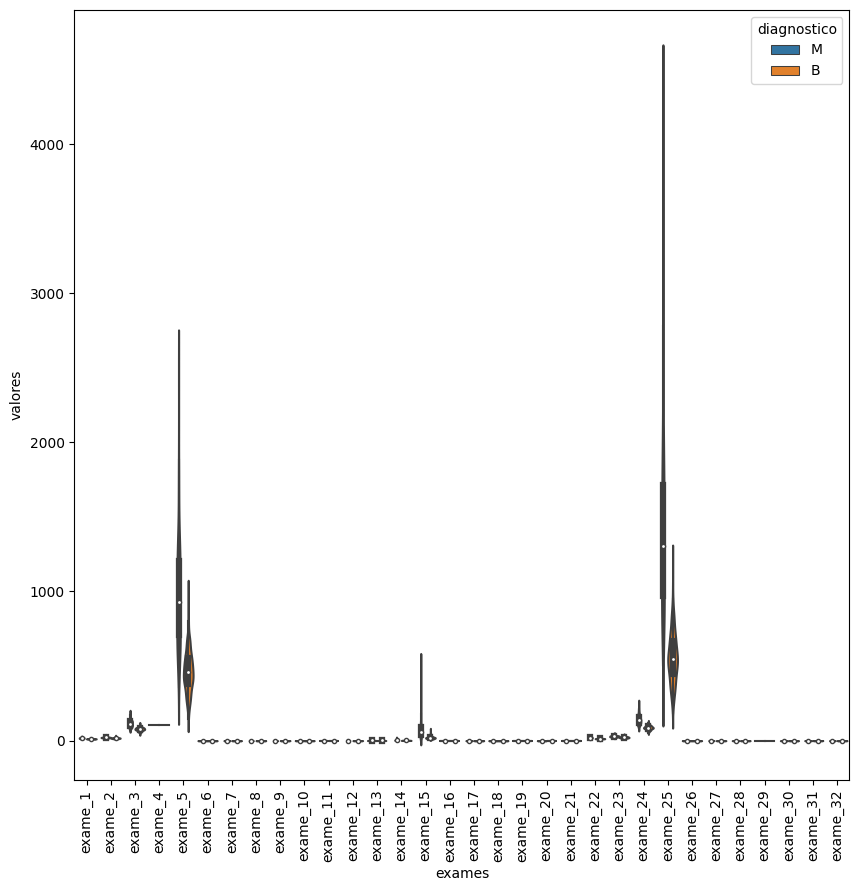

In [ ]:
import seaborn as sns # chama a biblioteca
import matplotlib.pyplot as plt

plt.figure(figsize =(10,10))
sns.violinplot(x = "exames", y = "valores", hue = "diagnostico",
               data = dados_plot) # grafico de violino

plt.xticks(rotation = 90)
# Notasse que por tem muitas variaveis exames o grafico ficou ruim de visualizar

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'exame_1'),
  Text(1, 0, 'exame_2'),
  Text(2, 0, 'exame_3'),
  Text(3, 0, 'exame_4'),
  Text(4, 0, 'exame_5'),
  Text(5, 0, 'exame_6'),
  Text(6, 0, 'exame_7'),
  Text(7, 0, 'exame_8'),
  Text(8, 0, 'exame_9'),
  Text(9, 0, 'exame_10')])

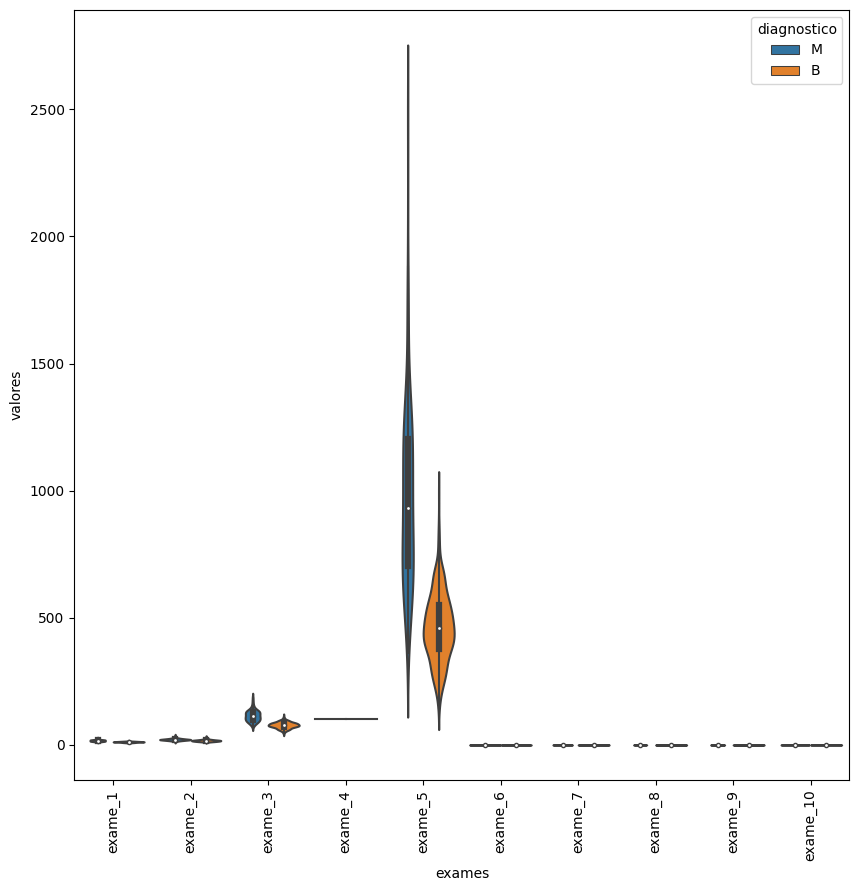

In [ ]:
dados_plot = pd.concat([diagnostico, valores_exames_v1.iloc[:,0:10]], axis = 1) # iloc faz com que traga apenas 10 exames e fique mais facil de enxergar
dados_plot = pd.melt(dados_plot, id_vars = 'diagnostico',
                     var_name = 'exames',
                     value_name = 'valores') # Transforma coluna e linhas

import seaborn as sns # chama a biblioteca
import matplotlib.pyplot as plt

plt.figure(figsize =(10,10))
sns.violinplot(x = "exames", y = "valores", hue = "diagnostico",
               data = dados_plot) # grafico de violino

plt.xticks(rotation = 90)
# Melhorou, porém, a visualização ainda está ruim

In [ ]:
# Melhorando a visualização

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'exame_1'),
  Text(1, 0, 'exame_2'),
  Text(2, 0, 'exame_3'),
  Text(3, 0, 'exame_4'),
  Text(4, 0, 'exame_5'),
  Text(5, 0, 'exame_6'),
  Text(6, 0, 'exame_7'),
  Text(7, 0, 'exame_8'),
  Text(8, 0, 'exame_9'),
  Text(9, 0, 'exame_10')])

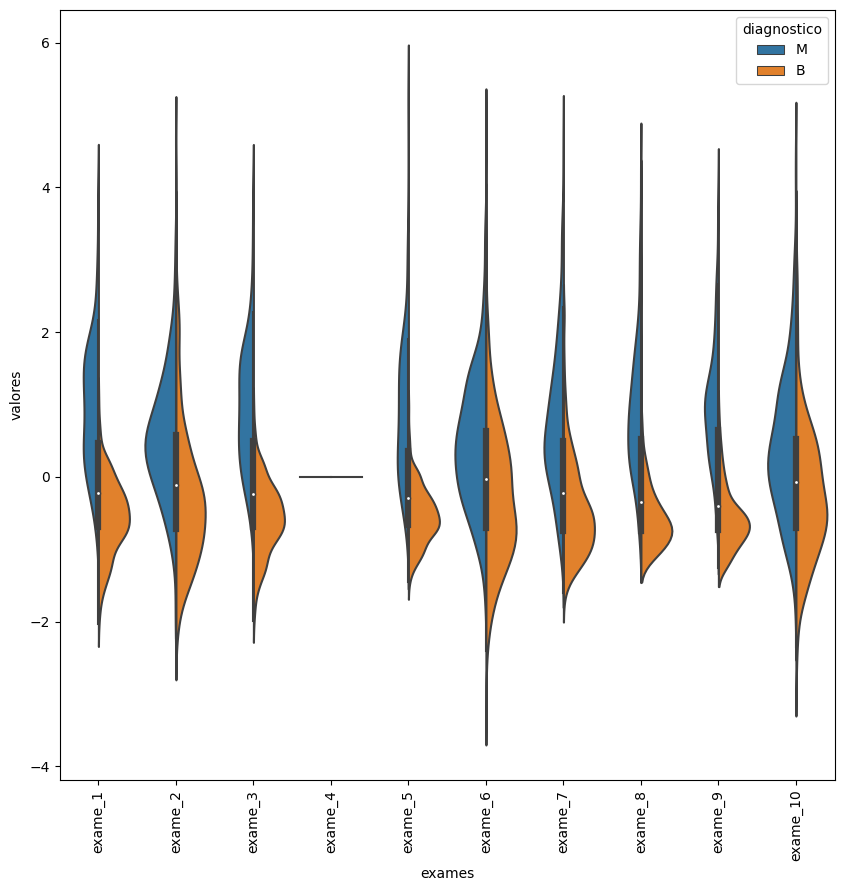

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


padronizador = StandardScaler()
padronizador.fit(valores_exames_v1) # Onde estão as features
valores_exames_v2 = padronizador.transform(valores_exames_v1) # Aplica a transformação do StandardScaler
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2, # Transforma abase em dataframe
                                 columns = valores_exames_v1.keys()) # As colunas da versão anterior do dataframe

dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,0:10]], axis = 1)
dados_plot = pd.melt(dados_plot, id_vars = 'diagnostico',
                     var_name = 'exames',
                     value_name = 'valores')

plt.figure(figsize =(10,10))
sns.violinplot(x = "exames", y = "valores", hue = "diagnostico",
               data = dados_plot, split = True) # split = True junta a variavel

plt.xticks(rotation = 90)

In [ ]:
# Trabalhando com valores constantes

In [ ]:
def grafico_violino(valores, inicio, fim): #grafico com as features selecionadas

    dados_plot = pd.concat([diagnostico, valores.iloc[:,inicio:fim]], axis = 1)
    dados_plot = pd.melt(dados_plot, id_vars="diagnostico",
                         var_name="exames",
                         value_name="valores")

    plt.figure(figsize=(10,10))

    sns.violinplot(x = "exames", y = "valores", hue = "diagnostico",
                    data = dados_plot, split = True)

    plt.xticks(rotation = 90)

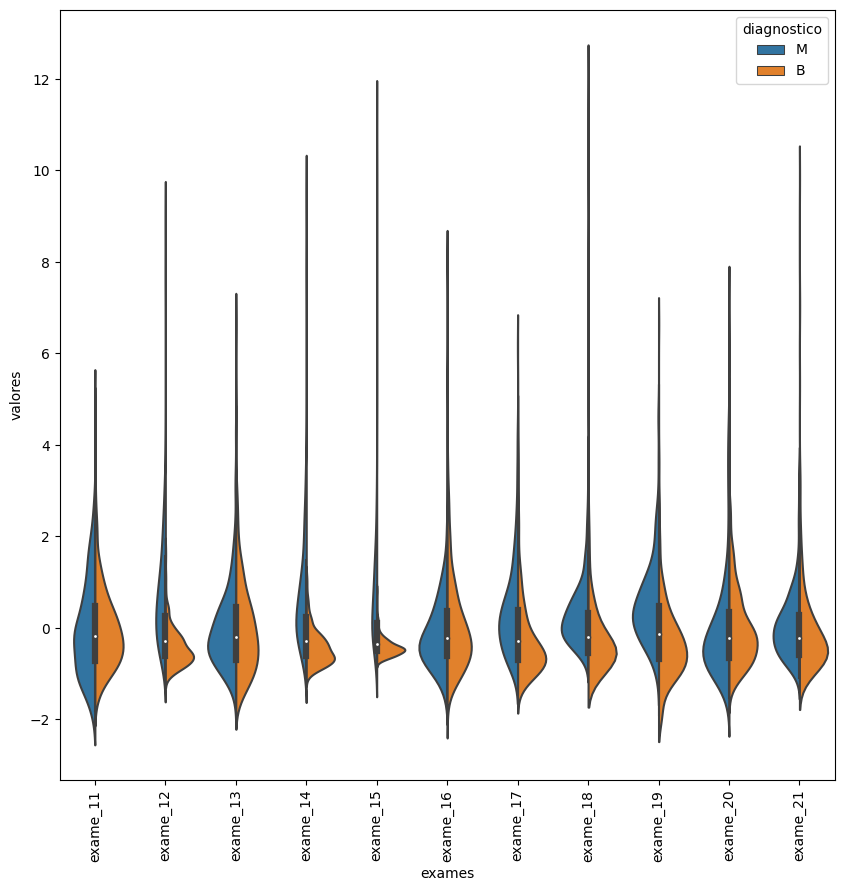

In [ ]:
grafico_violino(valores_exames_v2, 10, 21) # buscando features da 10 até a 21

In [ ]:
valores_exames_v3 = valores_exames_v2.drop(columns=["exame_29","exame_4"]) # exame_29 e exame_4 se mostraram variaveis constantes, por isso será desconsiderada

def classificar(valores): # Criando função pra executar o modelo antes visto
    SEED = 123143
    random.seed(SEED)

    treino_x, teste_x, treino_y, teste_y = train_test_split(valores, diagnostico, test_size = 0.3)

    classificador = RandomForestClassifier(n_estimators = 100)
    classificador.fit(treino_x, treino_y)
    classificador.fit(treino_x, treino_y)
    print("Resultado da classificação %.2f%%" % (classificador.score(teste_x, teste_y)* 100))

In [ ]:
classificar(valores_exames_v3)

Resultado da classificação 93.57%


In [ ]:
'''
Aula 3 - Dados Correlacionados
'''

'\nAula 3 - Dados Correlacionados\n'

In [ ]:
# Matriz de correlação

In [ ]:
valores_exames_v3.corr() # tras a correlação das variaveis

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
exame_2,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
exame_3,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
exame_5,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
exame_6,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
exame_7,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
exame_8,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
exame_9,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
exame_10,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
exame_11,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<Axes: >

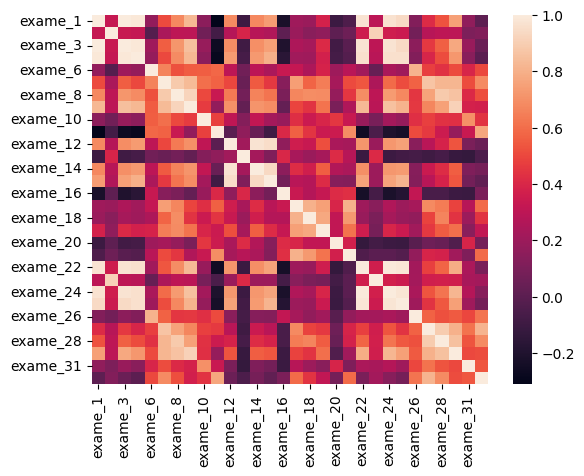

In [ ]:
# Versão 1 - Heatmap
matriz_correlacao = valores_exames_v3.corr()
sns.heatmap(matriz_correlacao) # mapa de calor das correlações das features

In [ ]:
# Versão 2 - Heatmap

<Axes: >

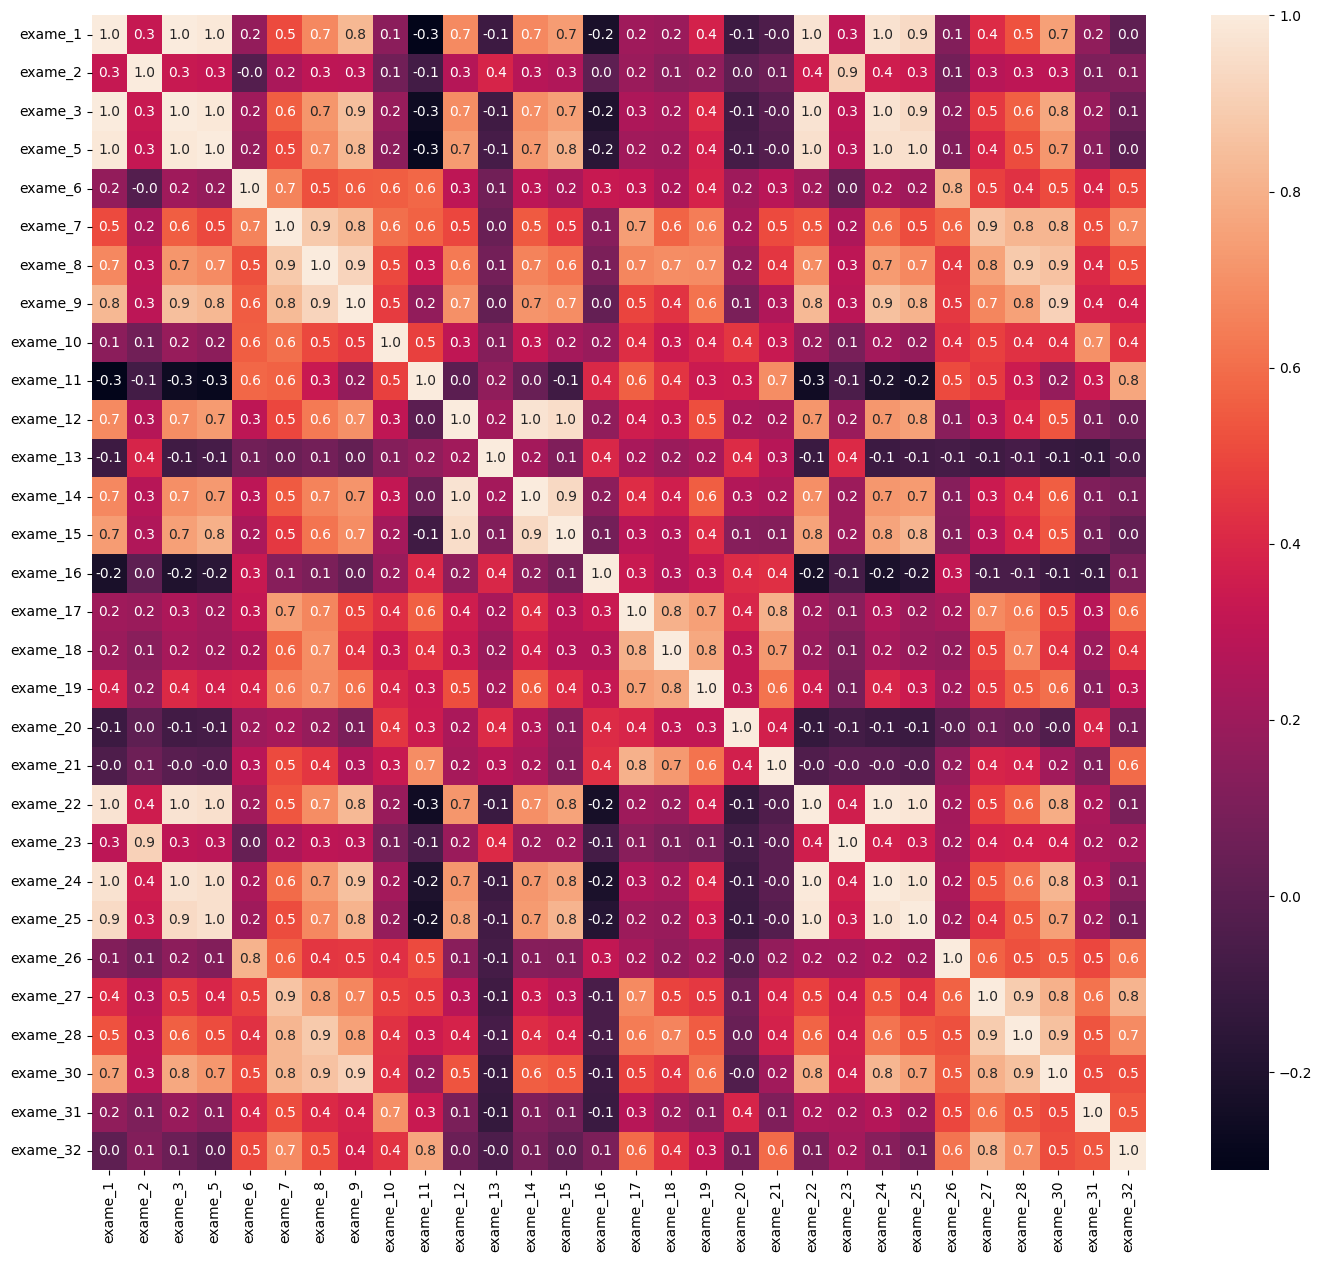

In [ ]:
matriz_correlacao = valores_exames_v3.corr()
plt.figure(figsize = (17, 15)) # Abre o número de features no graficos
sns.heatmap(matriz_correlacao, annot = True, fmt = ".1f") # annot aplia o valor em cada quadrado e fmt define o número de casas decimais

In [ ]:
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao >0.99] # Filtra variaveis acima de 0.99
matriz_correlacao_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
matriz_correlacao_v2 = matriz_correlacao_v1.sum() # Faz a soma dessas correlações
matriz_correlacao_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [ ]:
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2>1] # Verifica as que na soma passaram de 1
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [ ]:
valores_exames_v4 = valores_exames_v3.drop(columns= variaveis_correlacionadas.keys()) # Remove variaveis que ficaram acima de 1 do dataframe
valores_exames_v4.head()

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [ ]:
classificar(valores_exames_v4) # Executa o modelo sem as variaveis altamente correlacionadas

Resultado da classificação 94.15%


In [ ]:
# Desconsiderando apenas algumas das features altamente correlacionadas
valores_exames_v5 = valores_exames_v3.drop(columns=["exame_3","exame_24"])
classificar(valores_exames_v5)

Resultado da classificação 94.15%


In [ ]:
# Correlação e Causalidade

  # Não quer dizer que a correlação alta entre duas variaveis gera um fator de causa e efeito, correlação não condiz com causalidade necessariamente

In [ ]:
'''
Aula 4 - Automatizando a seleção
'''

'\nAula 4 - Automatizando a seleção\n'

In [ ]:
# SelectKbest
from sklearn.feature_selection import SelectKBest # chama o algoritmo
from sklearn.feature_selection import chi2


selecionar_kmelhores = SelectKBest(chi2,  # chi2 é função escolhida é a Qui quadrado(QUI²)
                                   k = 5) # K é numero de features que vamos selecionar

In [ ]:
selecionar_kmelhores

SelectKBest(k=5, score_func=<function chi2 at 0x799dfc9f67a0>)

In [ ]:
# Precisa separar treino e teste dnv
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v5,
                                                        diagnostico,
                                                        test_size = 0.3)

selecionar_kmelhores.fit(treino_x,treino_y)
# Rodando assim vai dar erro, pois existe features negativas, e o chi2 não opera com valores negativos, portanto, é necessario voltar a versão antes da normalização

ValueError: ignored

In [ ]:
# Versão antes da normalização

In [ ]:
valores_exames_v6 = valores_exames_v1.drop(columns=(["exame_4","exame_29","exame_3","exame_24"])) # desconsiderando exames com alta correlação

SEED = 1234
random.seed(SEED) # aplica o seed em train e test, e modelos

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                        diagnostico,
                                                        test_size = 0.3)

selecionar_kmelhores.fit(treino_x,treino_y) # aprende e faz a seleção
treino_kbest = selecionar_kmelhores.transform(treino_x) # aplica transformação no treino
teste_kbest = selecionar_kmelhores.transform(teste_x) # aplia transformação no teste

In [ ]:
treino_kbest.shape # Número de features que sobraram em treino

(398, 5)

In [ ]:
teste_kbest.shape # Número de features que sobraram em teste

(171, 5)

In [ ]:
# Aplicando o modelo com as variaveiaveis selecionadas pelo SelectKbest
classificador = RandomForestClassifier(n_estimators = 100, random_state= 1234)
classificador.fit(treino_kbest, treino_y)
classificador.score(teste_kbest,teste_y)

0.9239766081871345

In [ ]:
# Matriz de Confusão

In [ ]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(teste_y,classificador.predict(teste_kbest)) # Aplicou o predict direto na matriz

In [ ]:
matriz_confusao # Mostra matrix

array([[100,   5],
       [  8,  58]])

[Text(0.5, 19.049999999999997, 'Predição'), Text(46.25, 0.5, 'Real')]

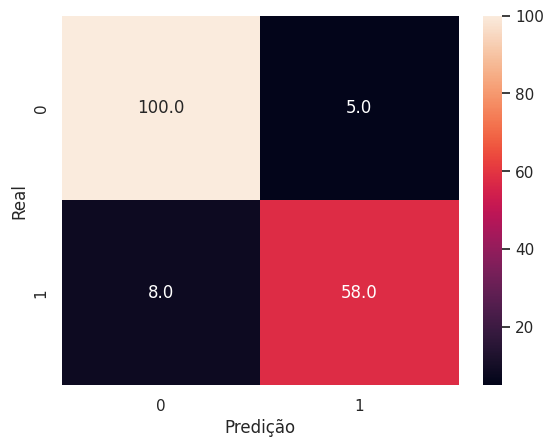

In [ ]:
sns.set() # Set as colunas
sns.heatmap(matriz_confusao, annot = True, fmt = '.1f').set(xlabel = 'Predição', ylabel = 'Real')

[Text(0.5, 40.249999999999986, 'Predição'), Text(77.25, 0.5, 'Real')]

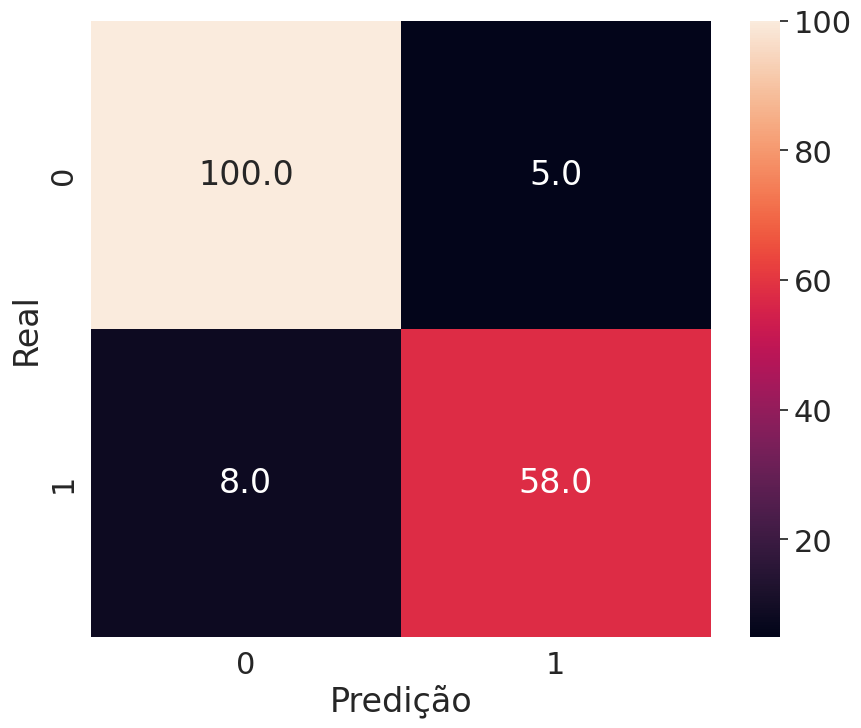

In [ ]:
plt.figure(figsize = (10,8)) # aumenta o grafico
sns.set(font_scale = 2) # aumenta em x vezes a fonte
sns.heatmap(matriz_confusao, annot = True, fmt = '.1f').set(xlabel = 'Predição', ylabel = 'Real')

In [ ]:
#  Seleção com RFE (recursive feature elimination)

Resultado da classificação 90.06%


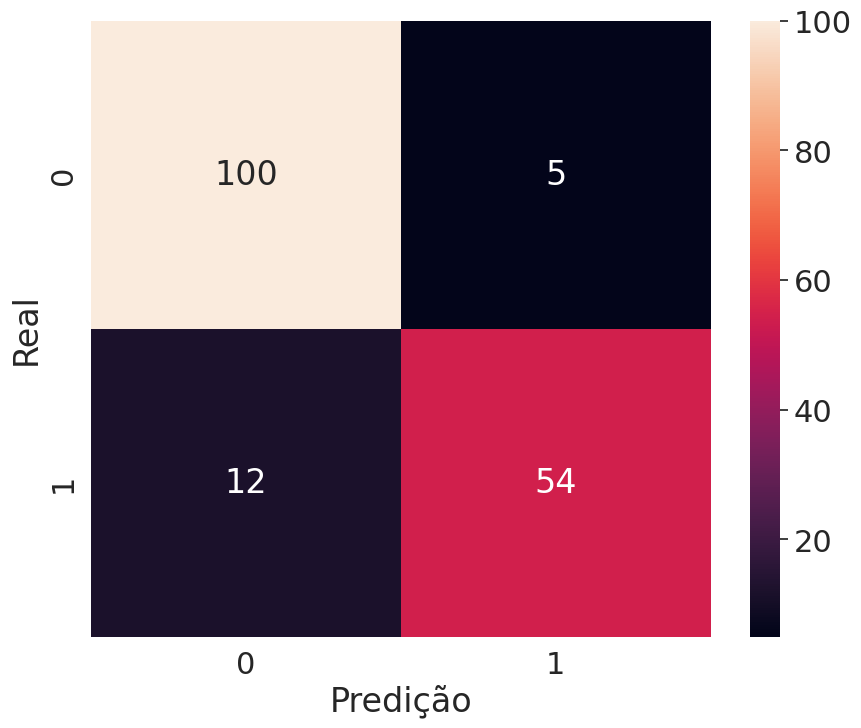

In [ ]:
from sklearn.feature_selection import RFE

SEED = 1234
random.seed(SEED)

# Chama denovo split treino e teste
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                       diagnostico,
                                                       test_size = 0.3)

# Chama denovo o modelo
classificador = RandomForestClassifier(n_estimators=100, random_state = 1234)
classificador.fit(treino_x, treino_y)

# Cria o RFE
selecionador_rfe = RFE(estimator = classificador, # Estimador seria o modelo
                     n_features_to_select = 5, # n_features_to_select é número de features que vamos selecionar
                     step = 1 ) # step é o numero de passos que será dado

selecionador_rfe.fit(treino_x, treino_y) # Ajusta aos dados de treino

# Transforma as features rfe
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)

# Modelo com RFE
classificador.fit(treino_rfe, treino_y) # Novo Fit


# Criar matriz de confusão
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfe, teste_y)* 100))

In [ ]:
'''
Aula 5 - Visualizando os dados no plano
'''

In [ ]:
#  Seleção com RFECV

Resultado da classificação 92.98%


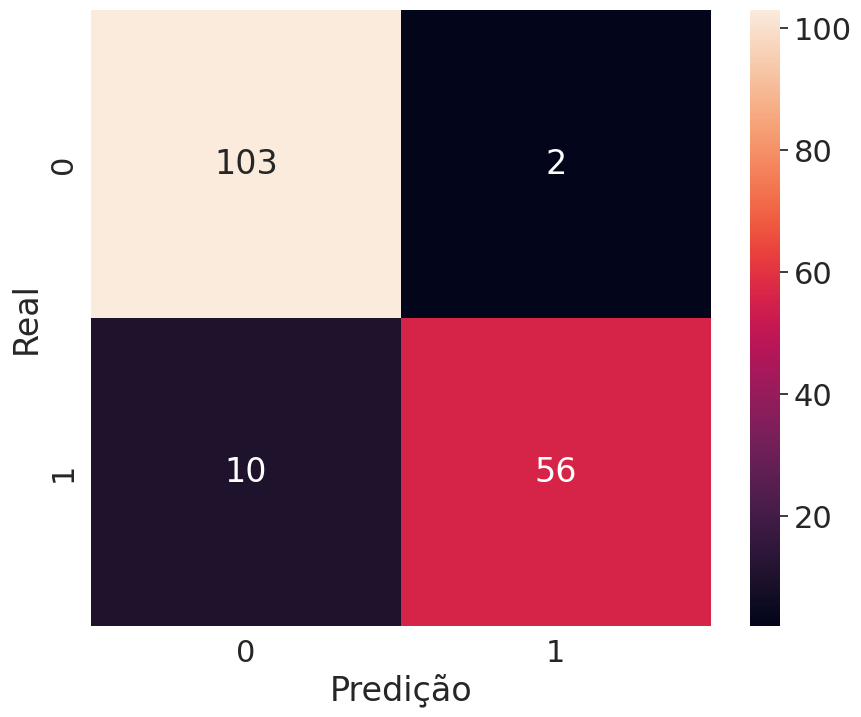

In [ ]:
from sklearn.feature_selection import RFECV # Chama a função

SEED = 1234
random.seed(SEED)

# Chama denovo split treino e teste
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                       diagnostico,
                                                       test_size = 0.3)

# Chama denovo o modelo
classificador = RandomForestClassifier(n_estimators=100, random_state = 1234)
classificador.fit(treino_x, treino_y)

# Cria o RFECV
selecionador_rfecv = RFECV(estimator = classificador, # Modelo que iremos usar de parametro
                          cv = 5, # CV são o número de blocos que será dividido
                          step = 1,
                          scoring = 'accuracy') # Qual a metrica que iremos usar para avaliar os blocos, no caso, estaos considerando acuracia

selecionador_rfecv.fit(treino_x, treino_y) # Ajusta aos dados de treino

# Transforma as features rfe
treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)

# Modelo com RFE
classificador.fit(treino_rfecv, treino_y) # Novo Fit


# Criar matriz de confusão
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfecv))
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfecv, teste_y)* 100))

In [ ]:
selecionador_rfecv.n_features_ # Número de features que o modelo usou

26

In [ ]:
treino_x.columns[selecionador_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

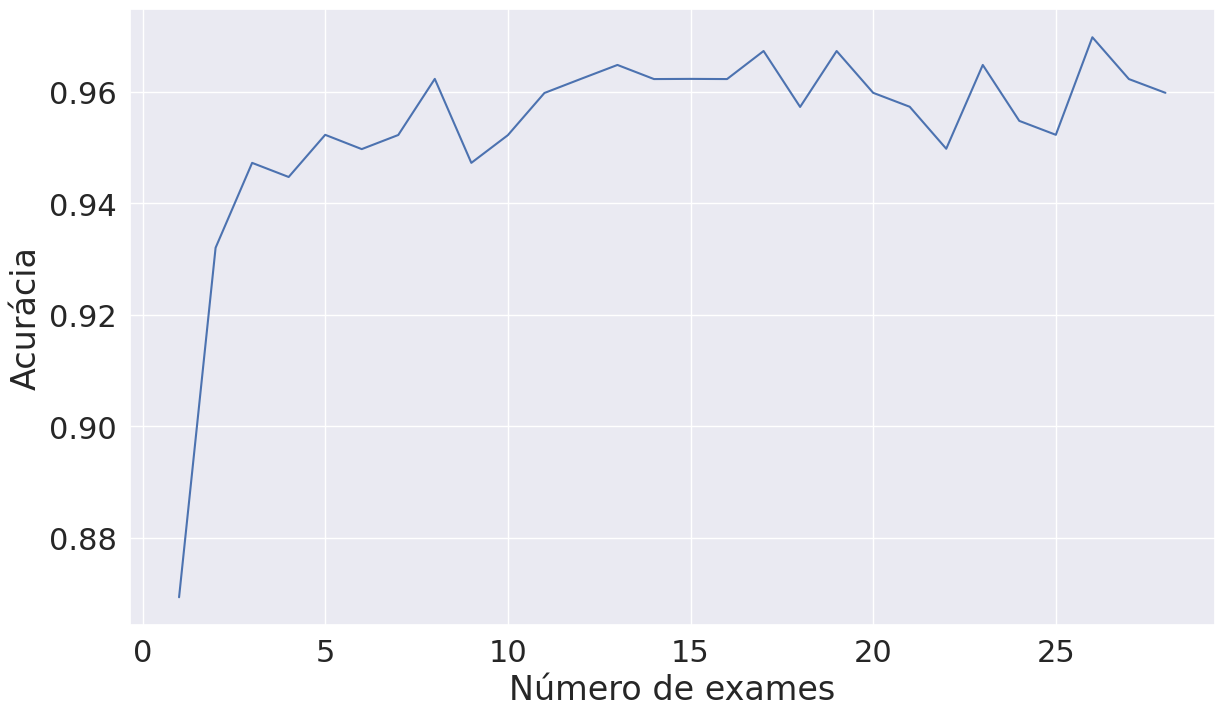

In [ ]:
# Visualizando graficamente o RFECV

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.xlabel("Número de exames")
plt.ylabel("Acurácia")

plt.plot(range(1, len(selecionador_rfecv.cv_results_['mean_test_score']) + 1), selecionador_rfecv.cv_results_['mean_test_score'])
plt.show

# grid_scores_ não existe mais, portanto, foi substituido por cv_results_['mean_test_score']

In [ ]:
# Visualizando dados no plano

Resultado da classificação 87.13%


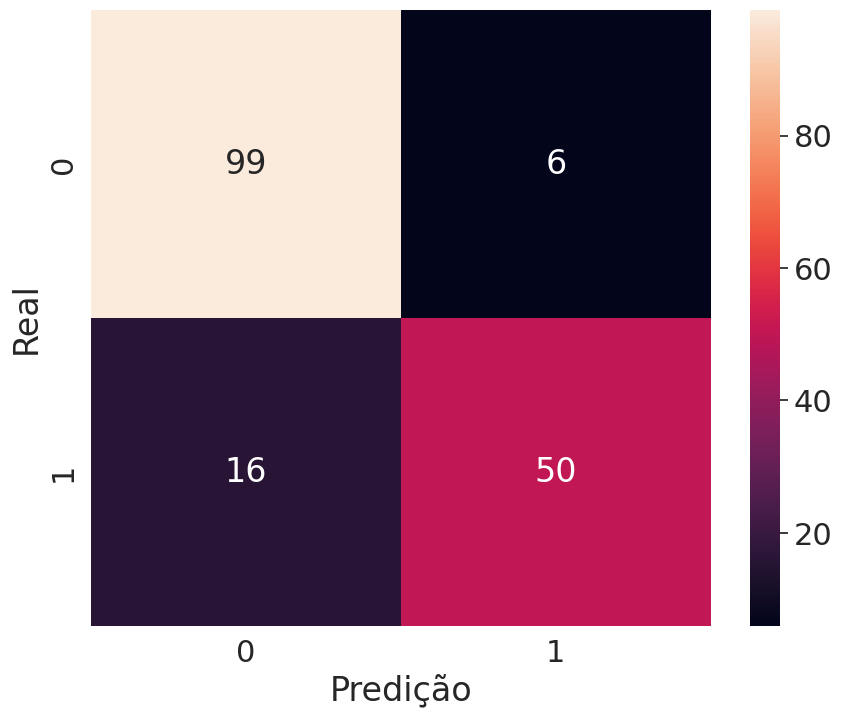

In [ ]:
from sklearn.feature_selection import RFE

SEED = 1234
random.seed(SEED)

# Chama denovo split treino e teste
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                       diagnostico,
                                                       test_size = 0.3)

# Chama denovo o modelo
classificador = RandomForestClassifier(n_estimators=100, random_state = 1234)
classificador.fit(treino_x, treino_y)

# Cria o RFE
selecionador_rfe = RFE(estimator = classificador,
                     n_features_to_select = 2,  # Trocado para 2 para que possa ser usado em plano de duas dimensões
                     step = 1 )

selecionador_rfe.fit(treino_x, treino_y) # Ajusta aos dados de treino

# Transforma as features rfe
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)

# Modelo com RFE
classificador.fit(treino_rfe, treino_y)

# Criar matriz de confusão
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfe, teste_y)* 100))

In [ ]:
valores_exames_v7 = selecionador_rfe.transform(valores_exames_v6) # Usado o selecionador_rfe acima para deixar apenas duas dimensões

In [ ]:
valores_exames_v7.shape # Mostra as duas dimensões

(569, 2)

<Axes: >

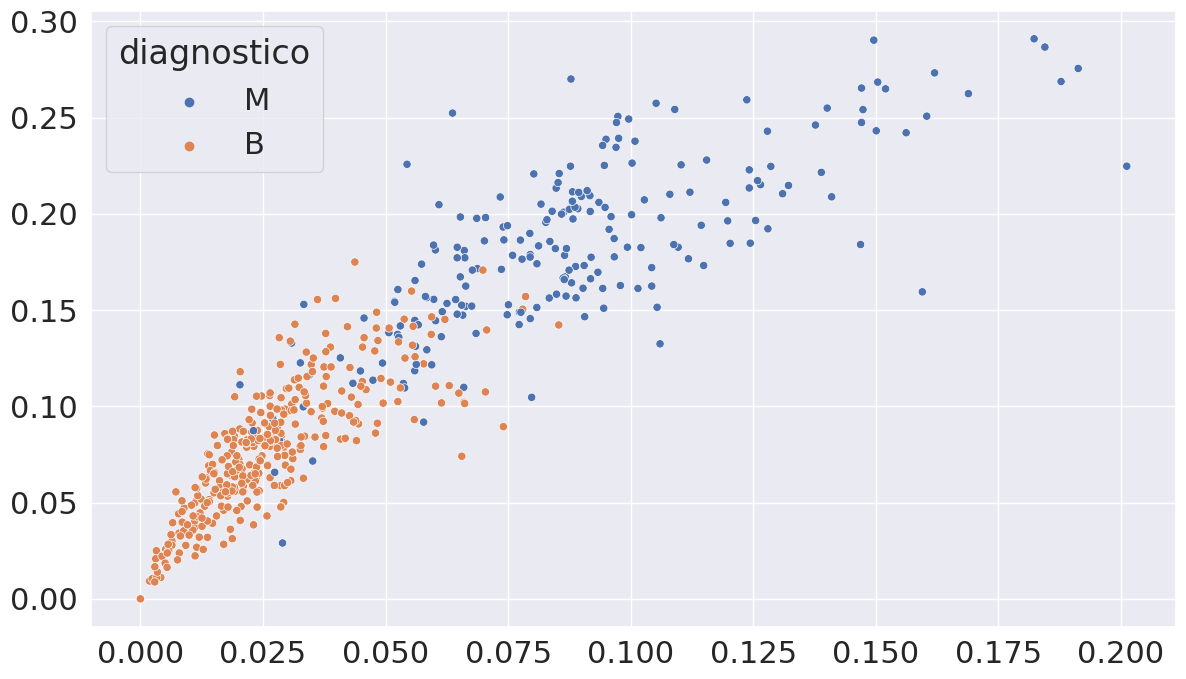

In [ ]:
import seaborn as sns

plt.figure(figsize = (14,8))
sns.scatterplot(x = valores_exames_v7[:,0], y = valores_exames_v7[:,1] , hue = diagnostico)

# Quando se seleciona duas features para graficos de duas dimensões pedesse bastante informação

In [ ]:
# PCA e TSNE

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 2) # n_components número de variaveis/dimensões que teremos retorno

valores_exames_v8 = pca.fit_transform(valores_exames_v6) # valores_exames_v6 escolhido, pois é seleção de variaveis mais recentes sem transformação/normalização

In [ ]:
valores_exames_v8 # Note que restaram apenas 2 dimensões

array([[1157.37688421, -293.81017696],
       [1267.4687997 ,   15.91568628],
       [ 994.05000153,   39.07405468],
       ...,
       [ 313.54257115,   47.32093974],
       [1121.40671014,   33.68512999],
       [-769.01504719,  -87.76799118]])

<Axes: >

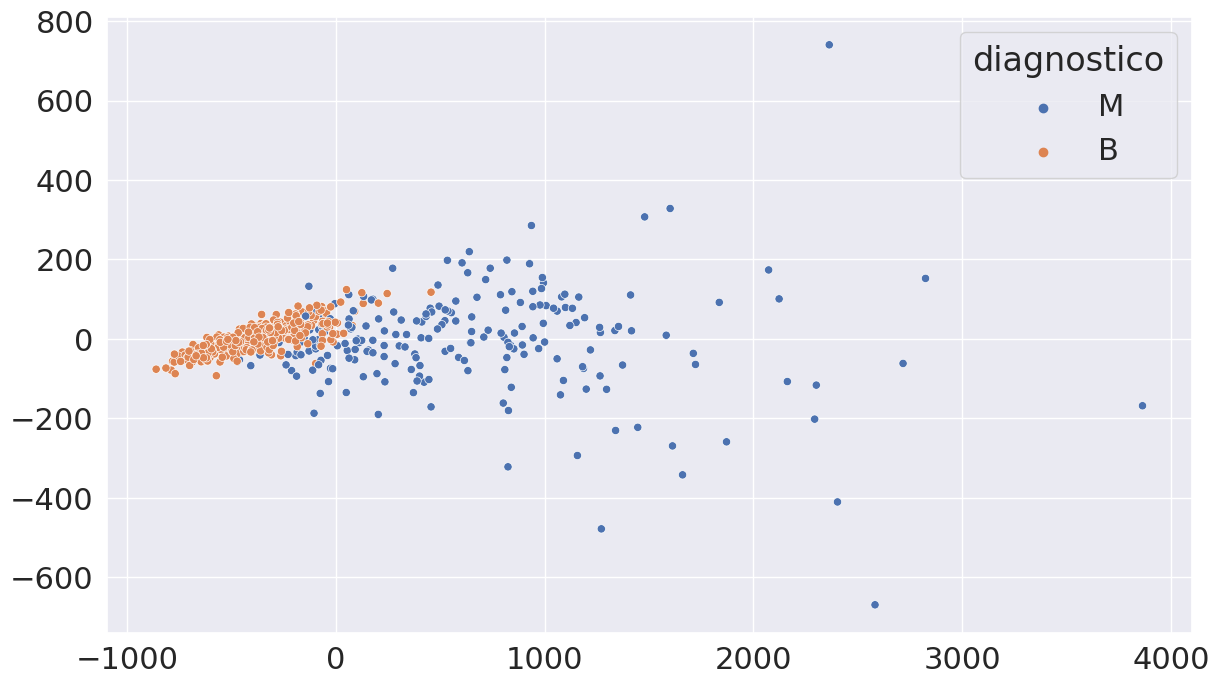

In [ ]:
# Executando com a base de duas dimensões
import seaborn as sns

plt.figure(figsize = (14,8))
sns.scatterplot(x = valores_exames_v8[:,0], y = valores_exames_v8[:,1] , hue = diagnostico)

<Axes: >

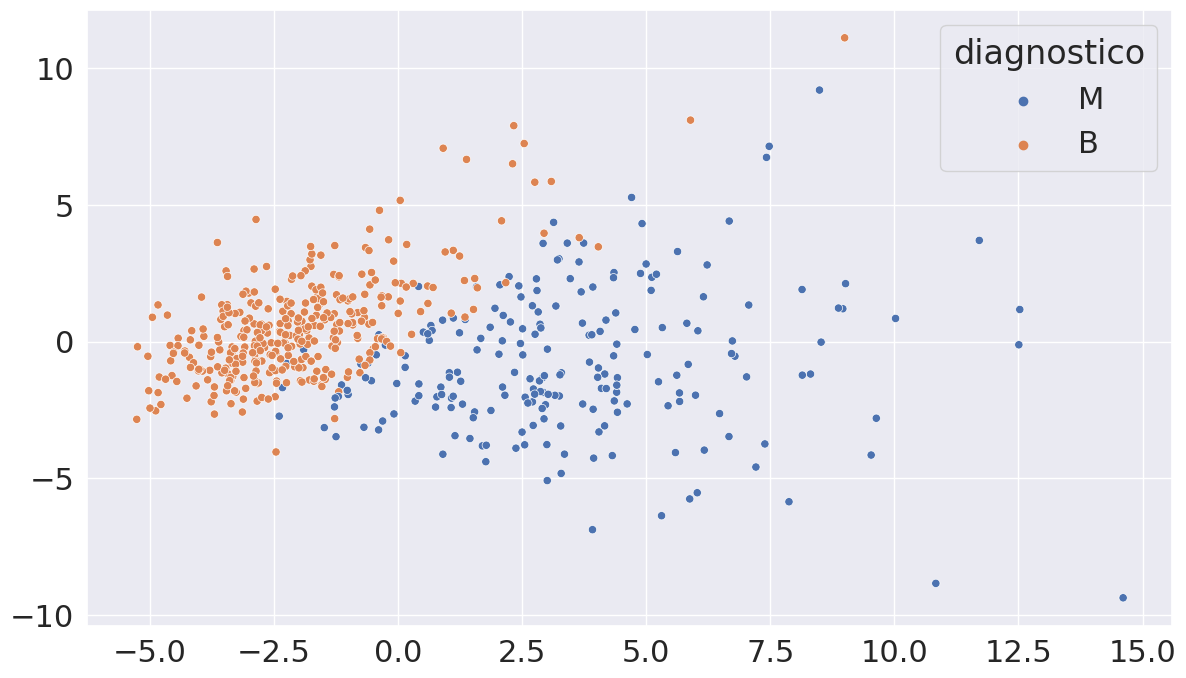

In [ ]:
# Executando com a base de duas dimensões com os dados normalizados
import seaborn as sns
from sklearn.decomposition import PCA

pca = PCA(n_components= 2) # n_components número de variaveis/dimensões que teremos retorno

valores_exames_v8 = pca.fit_transform(valores_exames_v5) # valores_exames_v5 possui os dados normalizados

plt.figure(figsize = (14,8))
sns.scatterplot(x = valores_exames_v8[:,0], y = valores_exames_v8[:,1] , hue = diagnostico)

<Axes: >

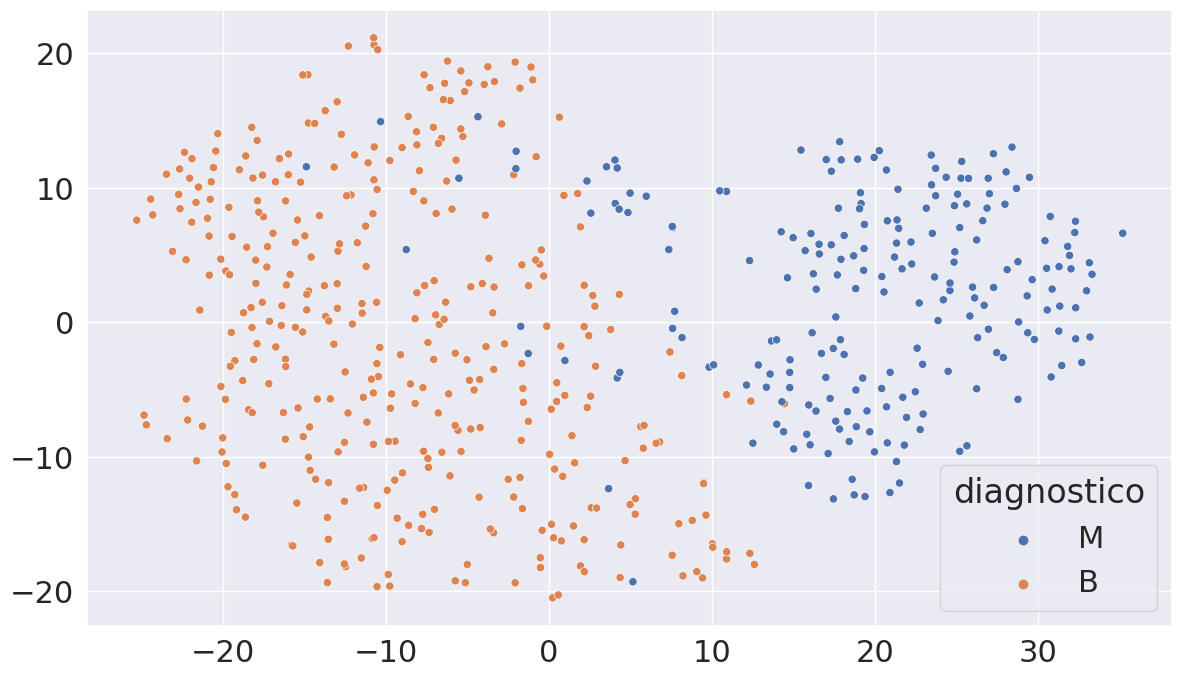

In [ ]:
# Aplicando TSNE e dando plot
from sklearn.manifold import TSNE

tsne = TSNE(n_components= 2) # n_components número de variaveis/dimensões que teremos retorno

valores_exames_v9 = tsne.fit_transform(valores_exames_v5) # valores_exames_v5 possui os dados normalizados

plt.figure(figsize = (14,8))
sns.scatterplot(x = valores_exames_v9[:,0], y = valores_exames_v9[:,1] , hue = diagnostico)